# ÔN THI CUỐI KỲ MÔN LT PTDL 1

Dương Hoàng Lan Anh_21087481

> Sử dụng bộ dữ liệu: Insurance.csv

Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Phần I: Khám phá dữ liệu

#### Đọc dữ liệu từ file csv

In [2]:
df = pd.read_csv('../data/insurance.csv', header=0, delimiter=',', encoding='utf-8')

#### Mô tả dữ liệu

Dữ liệu trong file insurance.csv chứa thông tin về chi phí bảo hiểm y tế của 1.338 bệnh nhân ở Hoa Kỳ. Các biến trong tập dữ liệu bao gồm:

* age: Tuổi của bệnh nhân
* bmi: Chỉ số khối cơ thể của bệnh nhân
* sex: Giới tính của bệnh nhân
* children: Số lượng con cái của bệnh nhân
* smoker: Nếu bệnh nhân hút thuốc hay không
* region: Vùng của Hoa Kỳ mà bệnh nhân sinh sống
* charges: Chi phí bảo hiểm y tế của bệnh nhân

#### Hiển thị 5 dòng dữ liệu đầu tiên

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Hiển thị 5 dòng dữ liệu cuối cùng

In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


#### Hiển thị thông tin của dữ liệu

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Hiển thị dòng dữ liệu bị trùng (nếu có)

In [6]:
print("Dòng dữ liệu bị trùng: ", df.duplicated().sum())

Dòng dữ liệu bị trùng:  1


#### Xóa dòng dữ liệu bị trùng

In [7]:
df.drop_duplicates(keep='first', inplace=True)

In [8]:
print("Dòng dữ liệu bị trùng: ", df.duplicated().sum())

Dòng dữ liệu bị trùng:  0


### Phần II: Tiền xử lý dữ liệu

#### Xác định các cột định tính

In [9]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
print("Các cột định tính: ", categorical_columns)

Các cột định tính:  ['sex', 'smoker', 'region']


#### Xác định các cột định lượng

In [10]:
numerical_columns = [col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64']
print("Các cột định lượng: ", numerical_columns)

Các cột định lượng:  ['age', 'bmi', 'children', 'charges']


#### Thống kê mô tả ở các cột định lượng

In [11]:
df[numerical_columns].describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Theo thông tin từ Trung tâm Kiểm soát và Phòng ngừa Dịch bệnh (CDC), chỉ số BMI được tính bằng cách chia cân nặng của một người cho bình phương chiều cao của họ. Các chỉ số BMI được phân loại như sau:

* Thiếu cân (underweight): BMI dưới 18,5

* Bình thường (healthy): BMI từ 18,5 đến 24,9

* Thừa cân (overweight): BMI từ 25,0 đến 29,9

* Béo phì (obese): BMI 30,0 trở lên

#### Tạo 1 cột mới có tên là bmi_categories

In [12]:
df['bmi_categories'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['underweight', 'healthy', 'overweight', 'obese'])

#### Định nghĩa hàm 'percentage_data' để tính toán số lượng và phần trăm xuất hiện của các giá trị trong cột 'bm_categories'

In [13]:
def percentage_data (df=None, column=None, sort=True):
    value_counts = df[column].value_counts(sort=sort)
    df_percentage = pd.DataFrame({'count': value_counts, 
                                  'percentage': round(value_counts *100 / len(df),2) 
                                })
    return df_percentage

In [14]:
percentage_data(df=df, column='bmi_categories')

,count,percentage
bmi_categories,,
obese,715,53.48
overweight,380,28.42
healthy,221,16.53
underweight,21,1.57


**Nhận xét:** 

* Có 53.28% người có chỉ số BMI thuộc nhóm béo phì

* Có 28.42% người có chỉ số BMI thuộc nhóm thừa cân

* Có 16.53% người có chỉ số BMI thuộc nhóm khỏe mạnh

* Có 1.57% người có chỉ số BMI thuộc nhóm thiếu cân

#### Kiểm tra xem có dữ liệu bị thiếu hay không?

In [15]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
bmi_categories    0
dtype: int64

**Nhận xét:** Không có dữ liệu bị thiếu

#### Trực quan hóa dữ liệu bị thiếu (nếu có) bằng biểu đồ heatmap

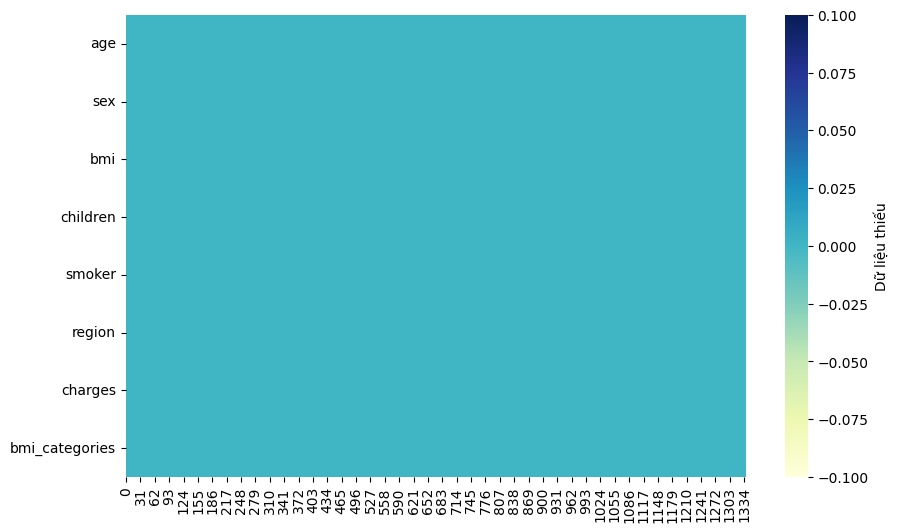

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose(), cmap='YlGnBu', cbar_kws={'label': 'Dữ liệu thiếu'})
plt.show()

**Nhận xét:** Không có dữ liệu bị thiếu

### Phần III: Các bài toán kiểm định

#### 1. Thực hiện kiểm định trung bình của 1 biến số (định lượng) bằng phương pháp T-Test bằng một giá trị nào đó với mức sai lầm là 5%. Cho nhận xét

Với One Sample T-Test:

- Mục đích: Kiểm định trung bình của 1 biến số (định lượng) có bằng một giá trị nào đó hay không

- Xác định giả thuyết H0 (μ1 = μ2)

- Xác định giả thuyết H1 (μ1 ≠ μ2)

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha = 0.05

- Quy tắc suy diễn:
    * Nếu p-value < alpha => bác bỏ giả thuyết H0
    * Nếu p-value > alpha => chấp nhận giả thuyết H0

In [17]:
# Dữ liệu về chỉ số BMI ở nữ giới
df_female_bmi = df[df['sex'] == 'female']['bmi']

In [18]:
pd.DataFrame(df_female_bmi)

,bmi
0,27.90
5,25.74
6,33.44
7,27.74
9,25.84
...,...
1332,44.70
1334,31.92
1335,36.85
1336,25.80


In [19]:
# Kiểm tra giá trị trung bình của df_female_bmi
df_female_bmi.mean()

30.37774924471299

Với One Sample T-Test:

- Mục đích: Kiểm định trung bình của 1 biến số (định lượng) có bằng một giá trị nào đó hay không

- Xác định giả thuyết H0: Giá trị trung bình của chỉ số BMI ở nữ giới BẰNG 30

- Xác định giả thuyết H1: Giá trị trung bình của chỉ số BMI ở nữ giới KHÔNG BẰNG 30

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha = 0.05

- Quy tắc suy diễn:
    * Nếu p-value < alpha => bác bỏ giả thuyết H0
    * Nếu p-value > alpha => chấp nhận giả thuyết H0

In [20]:
# Kiểm tra xem giá trị trung bình của chỉ số BMI ở nữ giới có bằng 30 hay không bằng phương pháp One Sample T-Test

import scipy.stats as stats
stats.ttest_1samp(df_female_bmi, popmean=30)

TtestResult(statistic=1.607543738855558, pvalue=0.10841267025460422, df=661)

**Nhận xét**

* Với mức ý nghĩa alpha = 5%, ta có alpha = 1.60 và p-value = 0.108 => p-value < alpha => bác bỏ giả thuyết H0

* Suy ra đủ dữ kiện để có thể khẳng định được rằng giá trị trung bình của chỉ số BMI ở nữ giới KHÔNG BẰNG 30

* Hay nói cách khác, bác bỏ giả thuyết H0 ở mức sai lầm 5%

#### Biểu đồ minh họa cho One Sample T-Test

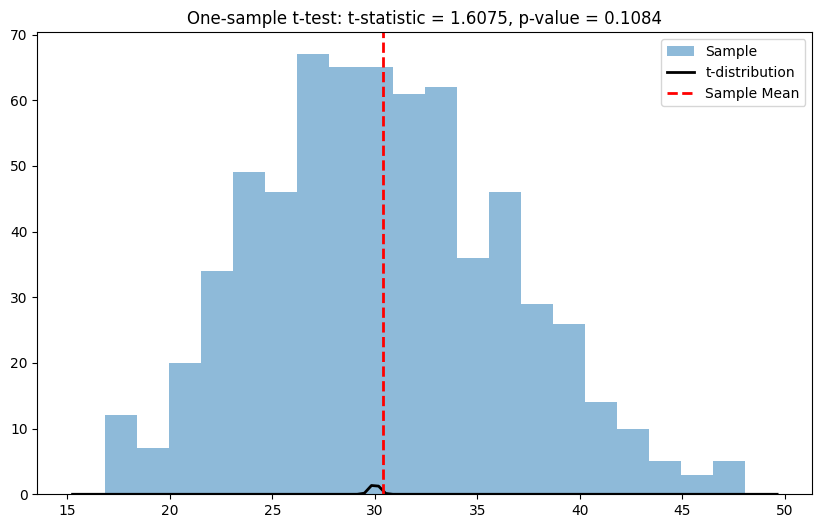

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Giả sử df_female_bmi là DataFrame chứa dữ liệu cần kiểm định

# Thực hiện kiểm định t-test một mẫu
t_stat, p_value = stats.ttest_1samp(df_female_bmi, popmean=30)

# Vẽ biểu đồ histogram cho mẫu và phân phối t
plt.figure(figsize=(10, 6))

# Biểu đồ histogram cho mẫu
plt.hist(df_female_bmi, bins=20, alpha=0.5, label='Sample')

# Vẽ đường phân phối t
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
data = len(df_female_bmi) - 1  # Số độ tự do
p = stats.t.pdf(x, df=data, loc=30, scale=np.std(df_female_bmi, ddof=1)/np.sqrt(len(df_female_bmi)))
plt.plot(x, p, 'k', linewidth=2, label='t-distribution')

# Đánh dấu giá trị t-statistic trên biểu đồ
plt.axvline(np.mean(df_female_bmi), color='red', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.title('One-sample t-test: t-statistic = {:.4f}, p-value = {:.4f}'.format(t_stat, p_value))
plt.legend()
plt.show()

### 2. Thực hiện kiểm định trung bình của 2 biến số (định lượng) có bằng nhau không bằng phương pháp T-Test với mức sai lầm là 10%. Cho nhận xét

Với Two Sample T-Test:
- Xác định giả thuyết H0 (μ1 = μ2)

- Xác định giả thuyết H1 (μ1 ≠ μ2)

- Mặc định mức tin cậy là 90% và mức sai lầm là 10% => mức ý nghĩa alpha = 0.1

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ H0
    * Nếu p-value > alpha thì chấp nhận H0

In [22]:
df_female_bmi = df[df['sex'] == 'female']['bmi']

In [23]:
# Dữ liệu về độ tuổi ở nữ giới
df_female_age = df[df['sex'] == 'female']['age']

In [24]:
pd.DataFrame(df_female_age)

,age
0,19
5,31
6,46
7,37
9,60
...,...
1332,52
1334,18
1335,18
1336,21


In [25]:
# Kiểm tra độ tuổi trung bình ở nữ giới
df_female_age.mean()

39.503021148036254

In [26]:
# Kiểm tra giá trị trung bình của df_female_bmi
df_female_bmi.mean()

30.37774924471299

Với Two Sample T-Test:
- Xác định giả thuyết H0: Độ tuổi trung bình ở nữ giới và chỉ số BMI trung bình ở nữ giới BẰNG nhau

- Xác định giả thuyết H1: Độ tuổi trung bình ở nữ giới và chỉ số BMI trung bình ở nữ giới KHÔNG BẰNG nhau

- Mặc định mức tin cậy là 90% và mức sai lầm là 10% => mức ý nghĩa alpha = 0.1

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ H0
    * Nếu p-value > alpha thì chấp nhận H0

In [27]:
# Kiểm tra xem độ tuổi trung bình ở nữ giới và chỉ số BMI trung bình ở nữ giới có bằng nhau hay không?
import scipy.stats as stats
stats.ttest_ind(df_female_age, df_female_bmi, equal_var=True)

TtestResult(statistic=15.346055603970838, pvalue=4.880029936901116e-49, df=1322.0)

**Nhận xét**

* Với mức ý nghĩa alpha = 10%, ta có alpha = 15.346 và p-value = 4.88 => p-value < alpha => bác bỏ giả thuyết H0

* Suy ra đủ dữ kiện để có thể khẳng định được rằng độ tuổi trung bình ở nữ giới và chỉ số BMI trung bình ở nữ giới KHÔNG BẰNG nhau

* Hay nói cách khác, bác bỏ giả thuyết H0 ở mức sai lầm 10%

#### Kiểm tra sự tương quan giữa 2 biến số (định lượng) bằng phương pháp Pearson's Correlation

Với Pearson's Correlation:

- Mục đích: Kiểm tra sự tương quan giữa 2 biến số (định lượng)

- Xác định giả thuyết H0: Không có sự tương quan giữa 2 biến số (r = 0)

- Xác định giả thuyết H1: Có sự tương quan giữa 2 biến số (r ≠ 0)

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha = 0.05

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ H0
    * Nếu p-value > alpha thì chấp nhận H0

In [28]:
# Kiểm tra xem độ tuổi trung bình ở nữ giới và chỉ số BMI trung bình ở nữ giới có tương quan với nhau hay không?

from scipy.stats.stats import pearsonr
pearsonr(df_female_age, df_female_bmi)

C:\Users\Lan Anh\AppData\Local\Temp\ipykernel_8028\3681852369.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.09721409367366018, pvalue=0.012333390854589118)

**Nhận xét:**

* Với mức ý nghĩa alpha = 5%, ta có alpha = 0.0972 và p-value = 0.0123 => p-value < alpha => bác bỏ giả thuyết H0

* Suy ra đủ dữ kiện để có thể khẳng định được rằng có sự tương quan giữa 2 biến số (r ≠ 0)

* Hay nói cách khác, bác bỏ giả thuyết H0 ở mức sai lầm 5%

#### Biểu đồ minh họa cho Pearson's Correlation

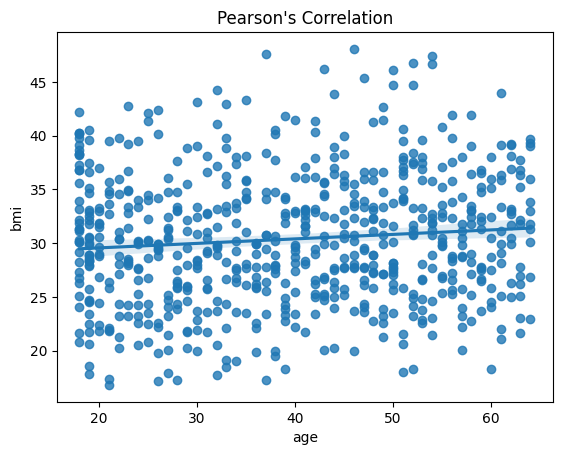

In [29]:
sns.regplot(x=df_female_age, y=df_female_bmi, data=df)
plt.title("Pearson's Correlation")
plt.show()

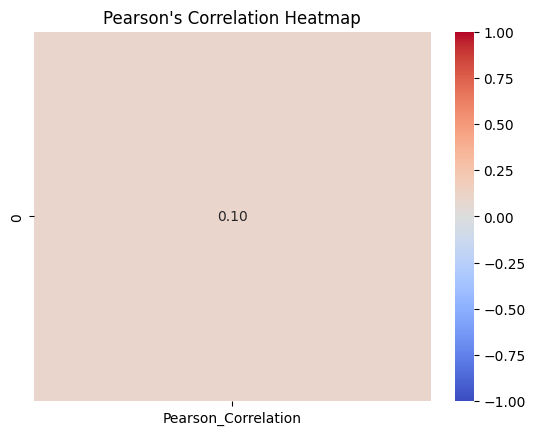

In [30]:
# Tính hệ số tương quan Pearson
correlation_coefficient, p_value = pearsonr(df_female_age, df_female_bmi)

# Tạo DataFrame chứa giá trị tương quan
correlation_df = pd.DataFrame(data=[[correlation_coefficient]], columns=['Pearson_Correlation'])

# Vẽ biểu đồ heatmap
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)

# Hiển thị biểu đồ
plt.title("Pearson's Correlation Heatmap")
plt.show()

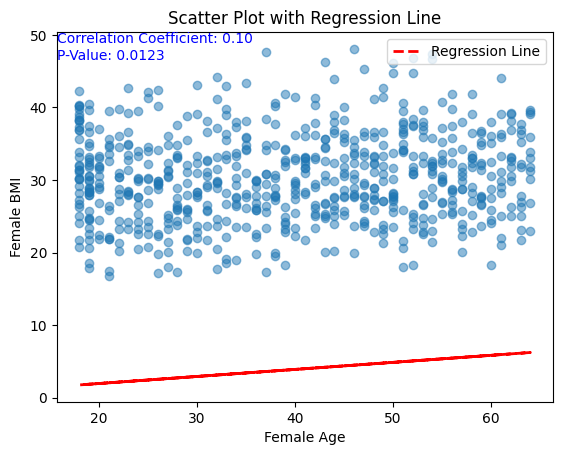

In [31]:
# Tính hệ số tương quan Pearson
correlation_coefficient, p_value = pearsonr(df_female_age, df_female_bmi)

# Vẽ biểu đồ scatter plot
plt.scatter(df_female_age, df_female_bmi, alpha=0.5)
plt.title("Scatter Plot with Regression Line")
plt.xlabel("Female Age")
plt.ylabel("Female BMI")

# Vẽ đường hồi quy
plt.plot(df_female_age, df_female_age * correlation_coefficient, color='red', linestyle='--', linewidth=2, label='Regression Line')

# Hiển thị giá trị hệ số tương quan và p-value trên biểu đồ
plt.text(plt.xlim()[0], plt.ylim()[1], f'Correlation Coefficient: {correlation_coefficient:.2f}\nP-Value: {p_value:.4f}', ha='left', va='top', fontsize=10, color='blue')

# Hiển thị chú thích
plt.legend(loc='upper right')

# Hiển thị biểu đồ
plt.show()

#### 3. Thực hiện kiểm định trung bình của 1 biến số (định lượng) bằng phương pháp Z-Test bằng một giá trị nào đó với mức sai lầm là 5%. Cho nhận xét

Với One Sample Z-Test:

- Mục đích: Kiểm định trung bình của 1 biến số (định lượng) có bằng một giá trị nào đó hay không

- Xác định giả thuyết H0 (μ1 = μ2)

- Xác định giả thuyết H1 (μ1 ≠ μ2)

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha = 0.05

- Quy tắc suy diễn:
    * Nếu p-value < alpha => bác bỏ giả thuyết H0
    * Nếu p-value > alpha => chấp nhận giả thuyết H0

In [32]:
# Lấy dữ liệu về chi phí y tế từ dataset insurance
medical_costs = df['charges']

In [33]:
pd.DataFrame(medical_costs)

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [34]:
# Lấy giá trị trung bình của medical_costs
medical_costs.mean()

13279.121486655948

Với One Sample Z-Test:

- Mục đích: Kiểm định trung bình của 1 biến số (định lượng) có bằng một giá trị nào đó hay không

- Xác định giả thuyết H0: Chi phí y tế trung bình của bệnh nhân BẰNG 13279

- Xác định giả thuyết H1: Chi phí y tế trung bình của bệnh nhân KHÔNG BẰNG 13279

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha = 0.05

- Quy tắc suy diễn:
    * Nếu p-value < alpha => bác bỏ giả thuyết H0
    * Nếu p-value > alpha => chấp nhận giả thuyết H0

In [35]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(medical_costs, value=13279)

(0.00036680668355372004, 0.9997073306169562)

**Nhận xét:**

* Với mức ý nghĩa alpha = 5%, ta có alpha = 0.0003668 và p-value = 0.999707 => p-value > alpha => chấp nhận giả thuyết H0

* Suy ra không đủ dữ kiện để có thể khẳng định được rằng chi phí y tế trung bình của bệnh nhân BẰNG 13279

* Hay nói cách khác, chấp nhận giả thuyết H0 ở mức sai lầm 5%

#### Biểu đồ minh họa cho One Sample Z-Test

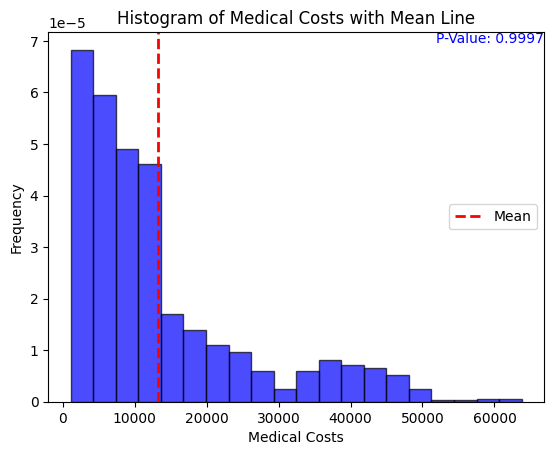

In [36]:
# Thực hiện kiểm định z
z_statistic, p_value = ztest(medical_costs, value=13279)

# Tính giá trị trung bình và độ lệch chuẩn
mean_value = np.mean(medical_costs)
std_dev = np.std(medical_costs)

# Vẽ histogram
plt.hist(medical_costs, bins=20, alpha=0.7, color='blue', edgecolor='black', density=True)

# Vẽ đường dọc cho giá trị trung bình
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')

# Hiển thị giá trị p-value
plt.text(plt.xlim()[1], plt.ylim()[1], f'P-Value: {p_value:.4f}', ha='right', va='top', fontsize=10, color='blue')

# Chú thích và hiển thị biểu đồ
plt.title("Histogram of Medical Costs with Mean Line")
plt.xlabel("Medical Costs")
plt.ylabel("Frequency")
plt.legend(loc='center right')
plt.show()

### 4. Thực hiện kiểm định trung bình của 2 biến số (định lượng) có bằng nhau không bằng phương pháp Z-Test với mức sai lầm là 10%. Cho nhận xét

Với Two Sample Z-Test:
- Xác định giả thuyết H0 (μ1 = μ2)

- Xác định giả thuyết H1 (μ1 ≠ μ2)

- Mặc định mức tin cậy là 90% và mức sai lầm là 10% => mức ý nghĩa alpha = 0.1

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ H0
    * Nếu p-value > alpha thì chấp nhận H0

In [37]:
# Lấy dữ liệu về chỉ số BMI ở nữ giới
df_female_bmi = df[df['sex'] == 'female']['bmi']

In [38]:
pd.DataFrame(df_female_bmi)

,bmi
0,27.90
5,25.74
6,33.44
7,27.74
9,25.84
...,...
1332,44.70
1334,31.92
1335,36.85
1336,25.80


In [39]:
# Lấy dữ liệu về độ tuổi ở nữ giới
df_female_age = df[df['sex'] == 'female']['age']

In [40]:
pd.DataFrame(df_female_age)

,age
0,19
5,31
6,46
7,37
9,60
...,...
1332,52
1334,18
1335,18
1336,21


In [41]:
# Lấy giá trị trung bình của df_female_ages
df_female_age.mean()

39.503021148036254

In [42]:
# Lấy giá trị trung bình của df_female_bmi
df_female_bmi.mean()

30.37774924471299

Với Two Sample Z-Test:
- Xác định giả thuyết H0: Độ tuổi trung bình ở nữ giới và chỉ số BMI trung bình ở nữ giới BẰNG nhau

- Xác định giả thuyết H1: Độ tuổi trung bình ở nữ giới và chỉ số BMI trung bình ở nữ giới KHÔNG BẰNG nhau

- Mặc định mức tin cậy là 90% và mức sai lầm là 10% => mức ý nghĩa alpha = 0.1

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ H0
    * Nếu p-value > alpha thì chấp nhận H0

In [43]:

# Kiểm tra xem độ tuổi trung bình ở nữ giới có bằng chỉ số BMI trung bình ở nữ giới hay không bằng phương pháp Z-Test
from statsmodels.stats.weightstats import ztest as ztest
ztest(df_female_age, df_female_bmi, value=0)

(15.346055603970838, 3.7638662990899988e-53)

**Nhận xét:**

* Với mức ý nghĩa alpha = 10%, ta có alpha = 15.346 và p-value = 3.76 => p-value < alpha => bác bỏ giả thuyết H0

* Suy ra đủ dữ kiện để có thể khẳng định được rằng độ tuổi trung bình ở nữ giới và chỉ số BMI trung bình ở nữ giới KHÔNG BẰNG nhau

* Hay nói cách khác, bác bỏ giả thuyết H0 ở mức sai lầm 10%

#### Biểu đồ minh họa cho Two Sample Z-Test

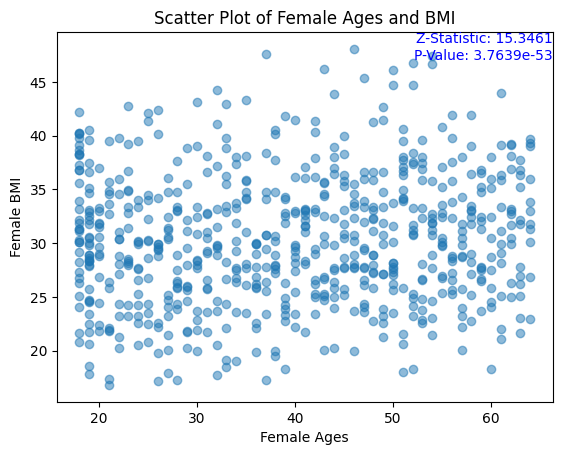

In [44]:
# Thực hiện kiểm định z
z_statistic, p_value = ztest(df_female_age, df_female_bmi, value=0)

# Tạo DataFrame từ dữ liệu
data = pd.DataFrame({'Female Ages': df_female_age, 'Female BMI': df_female_bmi})

# Vẽ biểu đồ scatter plot
plt.scatter(df_female_age, df_female_bmi, alpha=0.5)
plt.title("Scatter Plot of Female Ages and BMI")

# Hiển thị giá trị kiểm định z và p-value
plt.text(plt.xlim()[1], plt.ylim()[1], f'Z-Statistic: {z_statistic:.4f}\nP-Value: {p_value:.4e}', ha='right', va='top', fontsize=10, color='blue')

# Hiển thị biểu đồ
plt.xlabel("Female Ages")
plt.ylabel("Female BMI")
plt.show()

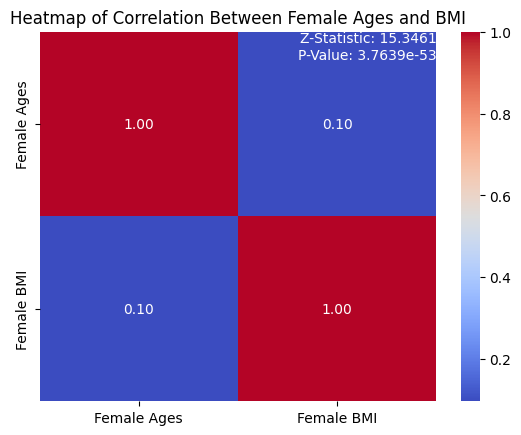

In [45]:
# Thực hiện kiểm định z
z_statistic, p_value = ztest(df_female_age, df_female_bmi, value=0)

# Tạo DataFrame từ dữ liệu
data = pd.DataFrame({'Female Ages': df_female_age, 'Female BMI': df_female_bmi})

# Tính toán ma trận tương quan
correlation_matrix = data.corr()

# Vẽ biểu đồ heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Hiển thị giá trị kiểm định z và p-value
plt.text(plt.xlim()[1], plt.ylim()[1], f'Z-Statistic: {z_statistic:.4f}\nP-Value: {p_value:.4e}', ha='right', va='top', fontsize=10, color='white')

# Hiển thị biểu đồ
plt.title("Heatmap of Correlation Between Female Ages and BMI")
plt.show()

#### Kiểm tra sự tương quan giữa 2 biến số (định lượng) bằng phương pháp Pearson's Correlation

Với Pearson's Correlation:

- Mục đích: Kiểm tra sự tương quan giữa 2 biến số (định lượng)

- Xác định giả thuyết H0: Không có sự tương quan giữa 2 biến số (r = 0)

- Xác định giả thuyết H1: Có sự tương quan giữa 2 biến số (r ≠ 0)

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha = 0.05

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ H0
    * Nếu p-value > alpha thì chấp nhận H0

In [46]:
from scipy.stats.stats import pearsonr
pearsonr(df_female_age, df_female_bmi)

C:\Users\Lan Anh\AppData\Local\Temp\ipykernel_8028\1694099957.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.09721409367366018, pvalue=0.012333390854589118)

**Nhận xét:**

* Với mức ý nghĩa alpha = 10%, ta có alpha = 0.097214 và p-value = 0.0123 => p-value < alpha => bác bỏ giả thuyết H0

* Suy ra đủ dữ kiện để có thể khẳng định được rằng có sự tương quan giữa 2 biến số (r ≠ 0)

* Hay nói cách khác, bác bỏ giả thuyết H0 ở mức sai lầm 10%

#### Biểu đồ minh họa cho Pearson's Correlation

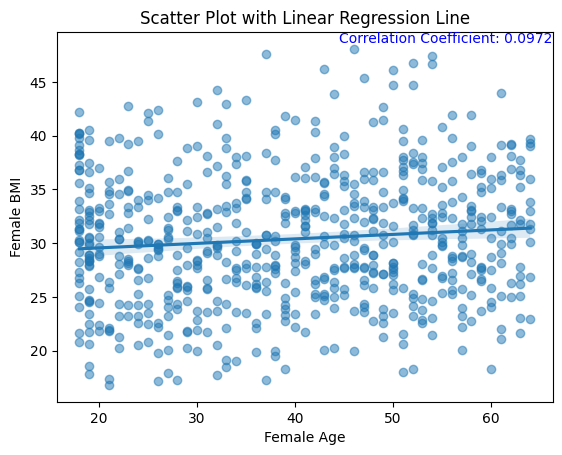

In [47]:
correlation_coefficient, _ = pearsonr(df_female_age, df_female_bmi)

# Tạo DataFrame từ dữ liệu
data = pd.DataFrame({'Female Age': df_female_age, 'Female BMI': df_female_bmi})

# Vẽ biểu đồ scatter plot và đường hồi quy tuyến tính
sns.regplot(x='Female Age', y='Female BMI', data=data, scatter_kws={'alpha': 0.5})

# Hiển thị giá trị của hệ số tương quan
plt.text(plt.xlim()[1], plt.ylim()[1], f'Correlation Coefficient: {correlation_coefficient:.4f}', ha='right', va='top', fontsize=10, color='blue')

# Hiển thị biểu đồ
plt.title("Scatter Plot with Linear Regression Line")
plt.xlabel("Female Age")
plt.ylabel("Female BMI")
plt.show()

#### 5. Thực hiện kiểm tra 2 biến định lượng có tương quan với nhau không bằng phương pháp Chi-Square với mức sai lầm là 5%? Cho nhận xét.

Với Chi-Square:

- Mục đích: Kiểm tra sự tương quan giữa 2 biến số (định lượng)

- Xác định giả thuyết H0: Không có sự tương quan giữa 2 biến số (r = 0)

- Xác định giả thuyết H1: Có sự tương quan giữa 2 biến số (r ≠ 0)

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha = 0.05

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ H0
    * Nếu p-value > alpha thì chấp nhận H0

In [48]:
# Kiểm tra xem độ tuổi trung bình ở nữ giới và chỉ số BMI trung bình ở nữ giới có tương quan với nhau hay không bằng phương pháp Chi-Square

from scipy.stats import chi2_contingency
crossdata = pd.crosstab(df_female_age, df_female_bmi)

In [49]:
crossdata

bmi,16.815,17.195,17.290,17.400,17.765,17.800,17.955,18.050,18.300,18.335,...,44.700,44.745,45.320,46.090,46.200,46.700,46.750,47.410,47.600,48.070
age,,,,,,,,,,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
stat, p, dof, excepted = chi2_contingency(crossdata)

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print ('Dependent (Bác bỏ giả thuyết H0)')
else:
    print ('Independent (Chấp nhận giả thuyết H0)')

p value is 0.718866994302118
Independent (Chấp nhận giả thuyết H0)


**Nhận xét:**

* Không có mối tương quan nào giữa độ tuổi trung bình ở nữ giới và chỉ số BMI trung bình ở nữ giới
* Kết luận: p-value = 0.79 > alpha = 0.05 => chấp nhận giả thuyết H0

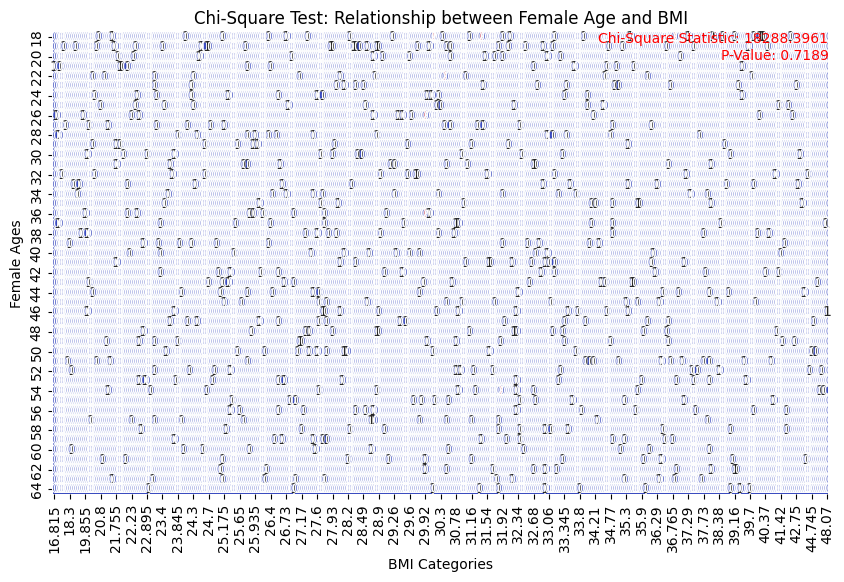

In [51]:
# Tạo bảng tần suất (contingency table)
crossdata = pd.crosstab(df_female_age, df_female_bmi)

# Thực hiện kiểm định chi-square
chi2_stat, p_value, a, b = chi2_contingency(crossdata)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crossdata, annot=True, cmap="coolwarm", fmt="d", cbar=False)

# Hiển thị giá trị của kiểm định chi-square và p-value
plt.text(plt.xlim()[1] + 0.1, plt.ylim()[1], f'Chi-Square Statistic: {chi2_stat:.4f}\nP-Value: {p_value:.4f}', ha='right', va='top', fontsize=10, color='red')

# Hiển thị biểu đồ
plt.title("Chi-Square Test: Relationship between Female Age and BMI")
plt.xlabel("BMI Categories")
plt.ylabel("Female Ages")
plt.show()

#### 6. Thực hiện kiểm tra 2 biến định lượng có tương quan với nhau không bằng phương pháp Fisher với mức sai lầm là 5%? Cho nhận xét.

Với Fisher Test:

- Mục đích: Kiểm tra sự tương quan giữa 2 biến số (định lượng)

- Xác định giả thuyết H0: Không có sự tương quan giữa 2 biến số (r = 0)

- Xác định giả thuyết H1: Có sự tương quan giữa 2 biến số (r ≠ 0)

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha = 0.05

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ H0
    * Nếu p-value > alpha thì chấp nhận H0

In [52]:
# Lấy dữ liệu về chỉ số BMI ở nam giới
df_male_bmi = df[df['sex'] == 'male']['bmi']

In [53]:
pd.DataFrame(df_male_bmi)

,bmi
1,33.770
2,33.000
3,22.705
4,28.880
8,29.830
...,...
1324,25.935
1325,33.535
1327,30.030
1329,38.600


In [54]:
# Lấy dữ liệu về độ tuổi ở nam giới
df_male_age = df[df['sex'] == 'male']['age']

In [55]:
pd.DataFrame(df_male_age)

,age
1,18
2,28
3,33
4,32
8,37
...,...
1324,31
1325,61
1327,51
1329,52


In [56]:
# Kiểm tra xem sự độc lập của 2 biến định lượng

import scipy.stats as stats
crosstable = pd.crosstab(df_male_age, df_male_bmi)

In [57]:
crosstable

bmi,15.960,16.815,17.290,17.385,17.480,17.670,17.860,18.335,18.715,18.905,...,45.430,45.540,45.900,46.530,47.520,47.740,49.060,50.380,52.580,53.130
age,,,,,,,,,,,,,,,,,,,,,
18,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
26,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
# Create a 2x2 contingency table from the male age and BMI data
crosstable = pd.crosstab(df_male_age, df_male_bmi).iloc[:2, :2]

# Perform Fisher's exact test
odd_ratio, p_value = stats.fisher_exact(crosstable)
print('odd ratio is: ' + str(odd_ratio))
print('p_value is: ' + str(p_value))

odd ratio is: nan
p_value is: 1.0


**Nhận xét:**

* Với mức ý nghĩa alpha là 5%, ta có p-value = 1.0 > alpha = 0.05 => chấp nhận giả thuyết H0

* Tức là, có đủ dữ kiện để có thể khẳng định được rằng không có sự tương quan giữa độ tuổi ở nam giới và chỉ số BMI ở nam giới

* Hay nói cách khác, chấp nhận giả thuyết H0 ở mức sai lầm 5%

#### Biểu đồ minh họa cho Fisher Test

Odds Ratio: nan
P-Value: 1.0


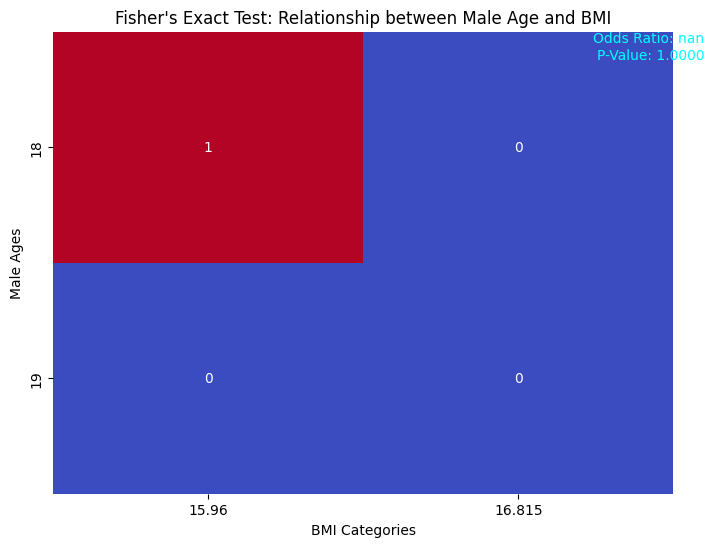

In [59]:
# Tạo bảng tần suất (contingency table)
crosstable = pd.crosstab(df_male_age, df_male_bmi).iloc[:2, :2]

# Thực hiện kiểm định Fisher's exact
odds_ratio, p_value = stats.fisher_exact(crosstable)
print('Odds Ratio:', odds_ratio)
print('P-Value:', p_value)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstable, annot=True, cmap="coolwarm", fmt="d", cbar=False)

# Hiển thị giá trị của kiểm định Fisher's exact và p-value
plt.text(plt.xlim()[1] + 0.1, plt.ylim()[1], f'Odds Ratio: {odds_ratio:.4f}\nP-Value: {p_value:.4f}', ha='right', va='top', fontsize=10, color='cyan')

# Hiển thị biểu đồ
plt.title("Fisher's Exact Test: Relationship between Male Age and BMI")
plt.xlabel("BMI Categories")
plt.ylabel("Male Ages")
plt.show()

#### 7.	Kiểm định ANOVA cho trường hợp biến định lượng trên nhóm định tính

Kiểm định ANOVA (Analysis of Variance) một chiều được sử dụng để kiểm tra sự khác biệt giữa giá trị trung bình của ba hoặc nhiều nhóm độc lập.

Kiểm định ANOVA:
- Xác định giả thuyết H0: Không có sự khác biệt đáng kể giữa các nhóm (tất cả các giá trị trung bình bằng nhau).

- Xác định giả thuyết H1: Có sự khác biệt đáng kể giữa các nhóm (ít nhất một giá trị trung bình khác nhau).

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha là 5%

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ giả thuyết H0
    * Nếu p-value > alpha thì chấp nhận giả thuyết H0

In [60]:
# Lấy dữ liệu về nam giới có hút thuốc
df_male_smokers = df[(df['sex'] == 'male') & (df['smoker'] == 'yes')]['age']

In [61]:
pd.DataFrame(df_male_smokers)

,age
14,27
19,30
29,31
30,22
34,28
...,...
1301,62
1303,43
1304,42
1307,32


Kiểm định ANOVA:
- Xác định giả thuyết H0: Không có sự khác biệt đáng kể giữa độ tuổi ở nam giới có hút thuốc so với độ tuổi tổng thể trong tập dữ liệu

- Xác định giả thuyết H1: Có sự khác biệt đáng kể giữa độ tuổi ở nam giới có hút thuốc so với độ tuổi tổng thể trong tập dữ liệu

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha là 5%

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ giả thuyết H0
    * Nếu p-value > alpha thì chấp nhận giả thuyết H0

In [62]:
'''
Thực hiện kiểm định ANOVA để kiểm tra xem có sự khác biệt đáng kể hay không 
giữa độ tuổi ở nam giới có hút thuốc 
so với độ tuổi tổng thể trong tập dữ liệu insurance.csv
'''

# Kiểm định ANOVA
print("Kiểm định ANOVA")
fvalue, pvalue = stats.f_oneway(df['age'], df_male_smokers)
print('F-value:', fvalue)
print('P-value:', pvalue)

# So sánh p-value với alpha
print("So sánh p-value với alpha: ")
if (pvalue < 0.05):
    print("Chấp nhận giả thuyết H0")
else:
    print("Bác bỏ giả thuyết H0")

Kiểm định ANOVA
F-value: 0.4352807484552287
P-value: 0.5095107666423067
So sánh p-value với alpha: 
Bác bỏ giả thuyết H0


**Nhận xét:** CÓ sự khác biệt đáng kể giữa độ tuổi ở nam giới có hút thuốc so với độ tuổi tổng thể trong tập dữ liệu

#### 8. Kiểm định ANOVA các biến định lượng trên từng nhóm theo phân phối chuẩn

Kiểm định ANOVA:
- Xác định giả thuyết H0: Không có sự khác biệt đáng kể giữa các nhóm (tất cả các giá trị trung bình bằng nhau).

- Xác định giả thuyết H1: Có sự khác biệt đáng kể giữa các nhóm (ít nhất một giá trị trung bình khác nhau).

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha là 5%

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ giả thuyết H0
    * Nếu p-value > alpha thì chấp nhận giả thuyết H0

In [63]:
# Lấy dữ liệu về độ tuổi của nhóm hút thuốc
smokers = df[df['smoker'] == 'yes']['age']

In [64]:
pd.DataFrame(smokers)

,age
0,19
11,62
14,27
19,30
23,34
...,...
1313,19
1314,30
1321,62
1323,42


In [65]:
# Lấy dữ liệu về độ tuổi của nhóm không hút thuốc
non_smokers = df[df['smoker'] == 'no']['age']

In [66]:
pd.DataFrame(non_smokers)

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


Kiểm định ANOVA:
- Xác định giả thuyết H0: Không có sự khác biệt đáng kể giữa độ tuổi của nhóm hút thuốc và nhóm không hút thuốc

- Xác định giả thuyết H1: Có sự khác biệt đáng kể giữa độ tuổi của nhóm hút thuốc và nhóm không hút thuốc

- Mặc định mức tin cậy là 95% và mức sai lầm là 5% => mức ý nghĩa alpha là 5%

- Quy tắc suy diễn:
    * Nếu p-value < alpha thì bác bỏ giả thuyết H0
    * Nếu p-value > alpha thì chấp nhận giả thuyết H0

In [67]:
'''
Thực hiện kiểm định ANOVA để kiểm tra xem có sự khác biệt đáng kể hay không 
giữa độ tuổi của nhóm có hút thuốc 
và nhóm không hút thuốc
'''

# Kiểm định ANOVA
print("Kiểm định ANOVA")
fvalue, pvalue = stats.f_oneway(smokers, non_smokers)
print('F-value:', fvalue)
print('P-value:', pvalue)

# So sánh p-value với alpha
print("So sánh p-value với alpha: ")
if (pvalue < 0.05):
    print("Chấp nhận giả thuyết H0")
else:
    print("Bác bỏ giả thuyết H0")

Kiểm định ANOVA
F-value: 0.8745978836309481
P-value: 0.34985468570149436
So sánh p-value với alpha: 
Bác bỏ giả thuyết H0


**Nhận xét:** CÓ sự khác biệt đáng kể giữa độ tuổi của nhóm có hút thuốc và nhóm không hút thuốc

### Phần IV: Bài toán hồi quy tuyến tính

#### 1. Thực hiện hồi quy tuyến tính từ Scikit-learn (dùng hàm LinearRegression()) cho trường hợp 1 biến và 2 biến.

##### Hồi quy tuyến tính 1 biến:

In [68]:
'''
Hãy sử dụng hồi quy tuyến tính để tìm mô hình dự đoán 
giá trị 'charges' (chi phí y tế) 
dựa trên biến 'age' (độ tuổi của bệnh nhân). 
Đánh giá mô hình tìm được.
'''

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Chọn biến độc lập và biến phụ thuộc
X = df[['age']]     # biến độc lập
y = df['charges']   # biến phụ thuộc

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán mô hình
y_pred = model.predict(X_test)

# Đánh giá mô hình
print('Slope: ', model.coef_)
print('Intercept: ', model.intercept_)
print('R-squared: ', model.score(X, y))
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Slope:  [237.01355269]
Intercept:  3768.5728438707993
R-squared:  0.08812456688145776
Mean squared error: 149128108.02
Coefficient of determination: 0.11


**Nhận xét:**

- Ta có phương trình cho mô hình hồi quy tuyến tính 1 biến là:

        y = ax + b

    Trong đó:

    y là biến phụ thuộc

    x là biến độc lập

    a là hệ số góc (slope)

    b là hệ số chặn (intercept)

        => y = (237.01 * x) + 3768.57

- Dựa vào giá trị R-squared là 0.0881, thể hiện mức độ biến thể của 'charges' mà mô hình có thể giải thích dựa trên 'age'. Giá trị này khá thấp, chỉ là 8.81%, điều này có thể đồng nghĩa với việc mô hình không giải thích được một phần lớn sự biến động trong 'charges'.


- Giá trị Mean Squared Error (MSE) bằng 149128108.02, là giá trị lỗi trung bình bình phương giữa giá trị thực tế và giá trị dự đoán trên tập kiểm tra. Giá trị MSE lớn có thể cho thấy mô hình không dự đoán chính xác giá trị 'charges'.

- Giá trị Coefficient of Determination trên tập kiểm tra là 0.11, tương tự như R-squared, thể hiện khả năng tổng quát hóa của mô hình trên dữ liệu mới. Giá trị này cũng khá thấp. Chứng tỏ rằng mô hình không thể dự đoán chính xác giá trị 'charges'.

#### Các biểu đồ minh họa cho kết quả của mô hình hồi quy tuyến tính 1 biến ở trên:

**Biểu đồ scatter plot cho dữ liệu thực tế và dữ liệu dự đoán để xem mối tương quan giữa độ tuổi của bệnh nhân và chi phí y tế**

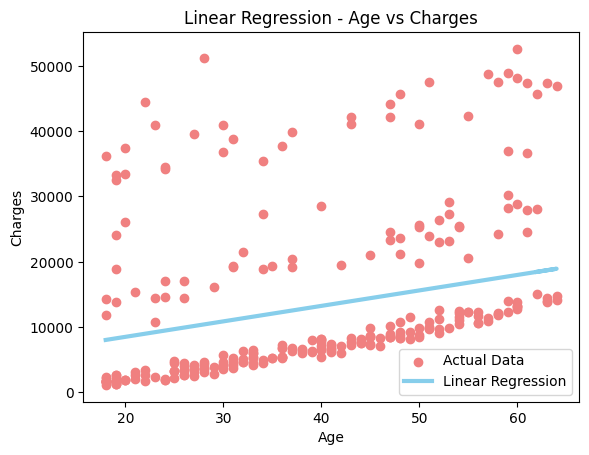

In [69]:
import matplotlib.pyplot as plt

# Vẽ scatter plot cho dữ liệu thực tế
plt.scatter(X_test, y_test, color='lightcoral', label='Actual Data')

# Vẽ đường hồi quy tuyến tính
plt.plot(X_test, y_pred, color='skyblue', linewidth=3, label='Linear Regression')

# Đặt tiêu đề và nhãn cho trục x, trục y
plt.title('Linear Regression - Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# Hiển thị legen
plt.legend()

# Hiển thị biểu đồ
plt.show()


**Biểu đồ phân phối (distplot) so sánh giữa giá trị thực tế (y_test) và giá trị dự đoán (y_pred) từ mô hình hồi quy tuyến tính 1 biến**

C:\Users\Lan Anh\AppData\Local\Temp\ipykernel_8028\2898867790.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, color="skyblue", label="Actual Charges", hist=False)
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

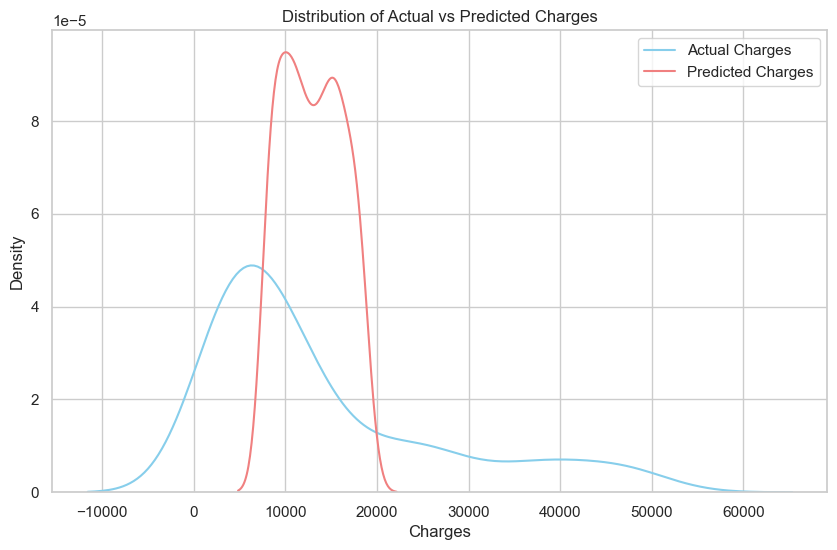

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo distplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.distplot(y_test, color="skyblue", label="Actual Charges", hist=False)
sns.distplot(y_pred, color="lightcoral", label="Predicted Charges", hist=False)

# Đặt tiêu đề và nhãn cho trục x, trục y
plt.title('Distribution of Actual vs Predicted Charges')
plt.xlabel('Charges')
plt.ylabel('Density')

# Hiển thị legend
plt.legend()

# Hiển thị biểu đồ
plt.show()


**Biểu đồ sai số dự đoán (residual plot) cho mô hình hồi quy tuyến tính 1 biến**

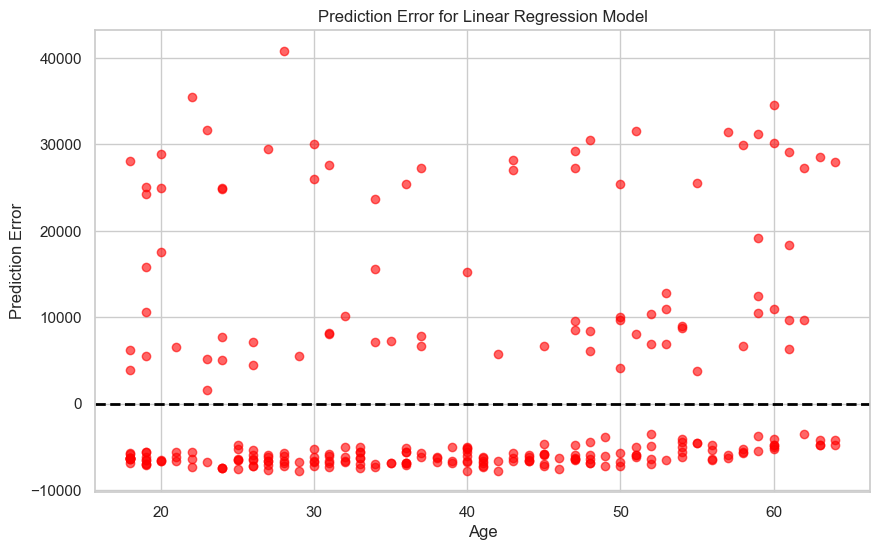

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Tính toán sai số dự đoán
errors = y_test - y_pred

# Vẽ biểu đồ prediction error
plt.figure(figsize=(10, 6))
plt.scatter(X_test, errors, color='red', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)  # Đường thẳng ở y=0 cho thấy khi dự đoán chính xác

# Đặt tiêu đề và nhãn cho trục x, trục y
plt.title('Prediction Error for Linear Regression Model')
plt.xlabel('Age')
plt.ylabel('Prediction Error')

# Hiển thị biểu đồ
plt.show()


##### Hồi quy tuyến tính 2 biến:

In [72]:
'''
Hãy sử dụng hồi quy tuyến tính để tìm mô hình dự đoán 
giá trị 'charges' (chi phí y tế) 
dựa trên biến 'age' (độ tuổi) và 'bmi' (chỉ số BMI) của bệnh nhân. 
Đánh giá mô hình tìm được.
'''

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Chọn biến độc lập và biến phụ thuộc
X = df[['age', 'bmi']]      # biến độc lập
y = df['charges']           # biến phụ thuộc

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Tạo mô hình hồi quy tuyến tính 
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán mô hình
y_pred = model.predict(X_test)

# Đánh giá mô hình
print('Slope: ', model.coef_)
print('Intercept: ', model.intercept_)
print('R-squared: ', model.score(X, y))
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Slope:  [224.67986614 268.24479123]
Intercept:  -4000.4926389069187
R-squared:  0.11482318315809403
Mean squared error: 140051167.55
Coefficient of determination: 0.17


**Nhận xét:**

- Ta có phương trình cho mô hình hồi quy tuyến tính 2 biến là:

        y = ax1 + bx2 + c

    Trong đó:

    y là biến phụ thuộc

    x1 là biến độc lập 1

    x2 là biến độc lập 2

    a là hệ số góc (slope) của x1

    b là hệ số góc (slope) của x2

    c là hệ số chặn (intercept)

        => y = 224.68 * x1 + 268.24 * x2 - 4000.49

- Dựa vào giá trị R-squared là 0.1148, thể hiện mức độ biến thể của 'charges' mà mô hình có thể giải thích dựa trên cả hai biến độc lập. Giá trị này khá thấp, chỉ là 11.48%, điều này có thể đồng nghĩa với việc mô hình không giải thích được một phần lớn sự biến động trong 'charges'.

- Đồng thời, giá trị Coefficient of Determination bằng 0.17, thể hiện khả năng tổng quát hóa của mô hình trên dữ liệu mới khá thấp. Chứng tỏ rằng mô hình không thể dự đoán chính xác giá trị 'charges'.

- Giá trị Mean Squared Error (MSE) bằng 140051167.55, là giá trị lỗi trung bình bình phương giữa giá trị thực tế và giá trị dự đoán trên tập kiểm tra. Giá trị MSE lớn có thể cho thấy mô hình không dự đoán chính xác giá trị 'charges'.

#### Các biểu đồ minh họa cho kết quả của mô hình hồi quy tuyến tính 2 biến ở trên:

**Biểu đồ scatter plot để so sánh giá trị thực tế (y_test) và giá trị dự đoán (y_pred) từ mô hình hồi quy tuyến tính 2 biến dựa trên biến độc lập 'age'**

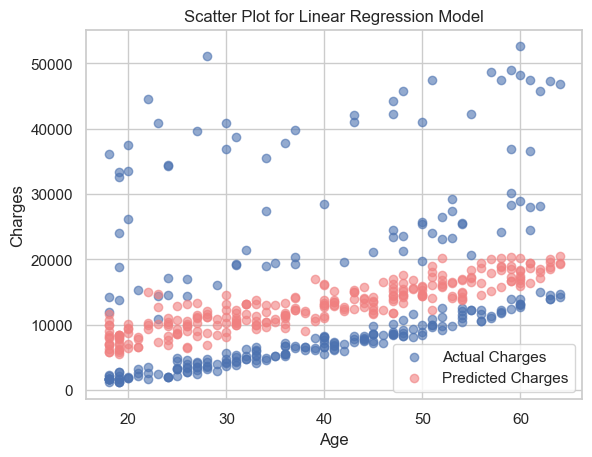

In [73]:
import matplotlib.pyplot as plt

# Biểu đồ scatter plot cho dữ liệu thực tế
plt.scatter(X_test['age'], y_test, label='Actual Charges', alpha=0.6)
plt.scatter(X_test['age'], y_pred, label='Predicted Charges', color='lightcoral', alpha=0.6)

# Đặt tiêu đề và nhãn cho trục x, trục y
plt.title('Scatter Plot for Linear Regression Model')
plt.xlabel('Age')
plt.ylabel('Charges')

# Hiển thị legend
plt.legend()

# Hiển thị biểu đồ
plt.show()


**Biểu đồ scatter plot để so sánh giá trị thực tế (y_test) và giá trị dự đoán (y_pred) từ mô hình hồi quy tuyến tính 2 biến dựa trên biến độc lập 'BMI'**

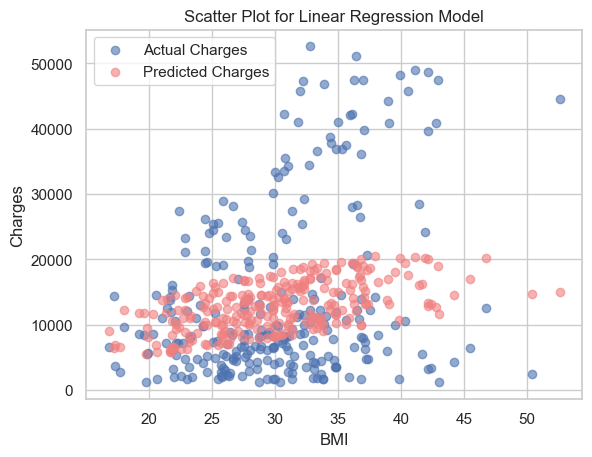

In [74]:
import matplotlib.pyplot as plt

# Biểu đồ scatter plot cho dữ liệu thực tế
plt.scatter(X_test['bmi'], y_test, label='Actual Charges', alpha=0.6)
plt.scatter(X_test['bmi'], y_pred, label='Predicted Charges', color='lightcoral', alpha=0.6)

# Đặt tiêu đề và nhãn cho trục x, trục y
plt.title('Scatter Plot for Linear Regression Model')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Hiển thị legend
plt.legend()

# Hiển thị biểu đồ
plt.show()


**Biểu đồ sai số dự đoán (residual plot) cho mô hình hồi quy tuyến tính 2 biến**

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


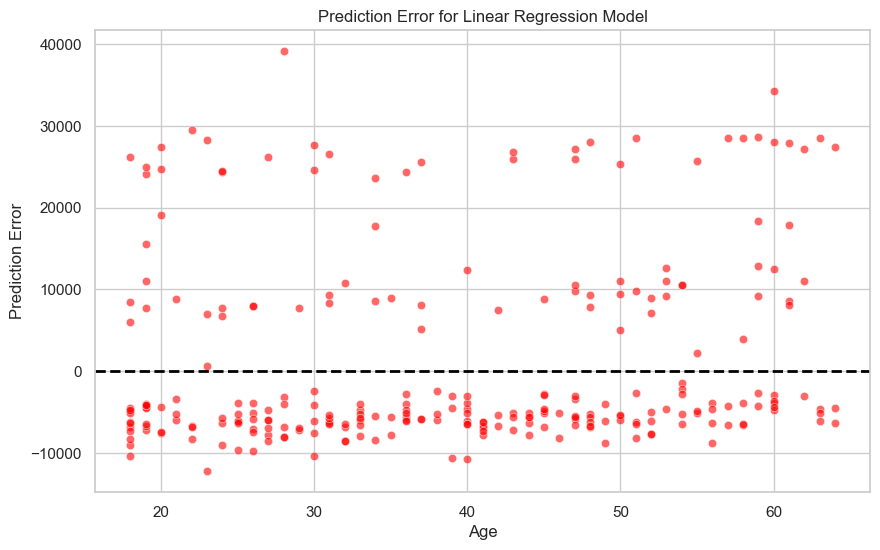

In [75]:
import seaborn as sns

# Tính toán sai số dự đoán
errors = y_test - y_pred

# Vẽ biểu đồ prediction error
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['age'], y=errors, color='red', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)

# Đặt tiêu đề và nhãn cho trục x, trục y
plt.title('Prediction Error for Linear Regression Model')
plt.xlabel('Age')
plt.ylabel('Prediction Error')

# Hiển thị biểu đồ
plt.show()


**Biểu đồ phân phối (distplot) so sánh giữa giá trị thực tế (y_test) và giá trị dự đoán (y_pred) từ mô hình hồi quy tuyến tính 2 biến**

C:\Users\Lan Anh\AppData\Local\Temp\ipykernel_8028\141926015.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, color="skyblue", label="Actual Charges", hist=False)
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN bef

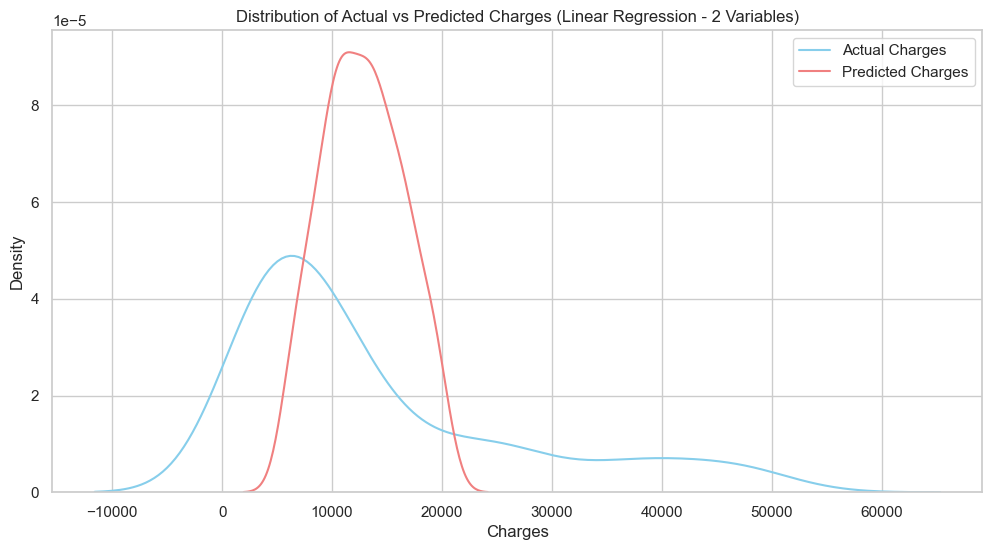

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo distplot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Biểu đồ phân phối cho giá trị thực tế (Actual Charges)
sns.distplot(y_test, color="skyblue", label="Actual Charges", hist=False)

# Biểu đồ phân phối cho giá trị dự đoán (Predicted Charges)
sns.distplot(y_pred, color="lightcoral", label="Predicted Charges", hist=False)

# Đặt tiêu đề và nhãn cho trục x, trục y
plt.title('Distribution of Actual vs Predicted Charges (Linear Regression - 2 Variables)')
plt.xlabel('Charges')
plt.ylabel('Density')

# Hiển thị legend
plt.legend()

# Hiển thị biểu đồ
plt.show()


#### 2.	Thực hiện hồi quy tuyến tính bằng phương pháp StaSmodels (Dùng hàm OLS()) cho trường hợp 1 biến và 2 biến.

##### Hồi quy tuyến tính 1 biến:

In [77]:
'''
Thực hiện hồi quy tuyến tính bằng phương pháp StaSmodels (Dùng hàm OLS()) 
dùng để dự đoán chi phí y tế dựa trên độ tuổi của bệnh nhân
'''

import statsmodels.api as sm

# Chọn biến độc lập và biến phụ thuộc
X = df['age']       # biến độc lập
y = df['charges']   # biến phụ thuộc

# Thêm hằng số vào X
X = sm.add_constant(X)

# Tạo mô hình hồi quy tuyến tính
model = sm.OLS(y, X)

# Huấn luyện mô hình
results = model.fit()

# In ra kết quả
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     130.4
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           6.98e-29
Time:                        04:43:02   Log-Likelihood:                -14405.
No. Observations:                1337   AIC:                         2.881e+04
Df Residuals:                    1335   BIC:                         2.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3190.0217    938.396      3.399      0.001    1349.130    5030.913
age          257.2297     22.526     11.419      0.000     213.040     301.419
==============================================================================
Omnibus:                      398.876   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              861.815
Skew:                           1.731   Prob(JB):                    7.23e-188
Kurtosis:                       4.865   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Nhận xét:**

* Adj. R-squared = 8.9%: khá thấp. Đây là mức độ thấp và chỉ ra rằng mô hình chỉ giải thích một phần nhỏ sự biến động của biến phụ thuộc (charges). 

* Prob (F-statistic) = 6.98e-29 (gần bằng 0). Điều này cho thấy mô hình hồi quy tuyến tính 1 biến này có độ chính xác cao.

* P>|t| = 0.0 => Điều này chỉ ra rằng giá trị của 'age' có ảnh hưởng đến giá trị của 'charges'.

* Ta có phương trình tổng quát cho mô hình hồi quy tuyến tính 1 biến là:

        charges = const + (age * coef_age)

        charges = 3190.0217 + (257.2297 × age)

Trong đó:

* const: Hệ số chặn (intercept) là 3190.0217.
* age: Biến độc lập là age.
* coef_age: Hệ số của age là 257.2297

**Các biểu đồ minh họa cho kết quả của mô hình hồi quy tuyến tính 1 biến ở trên:**

**Biểu đồ scatter plot cho dữ liệu thực tế và dữ liệu dự đoán để xem mối tương quan giữa độ tuổi của bệnh nhân và chi phí y tế**

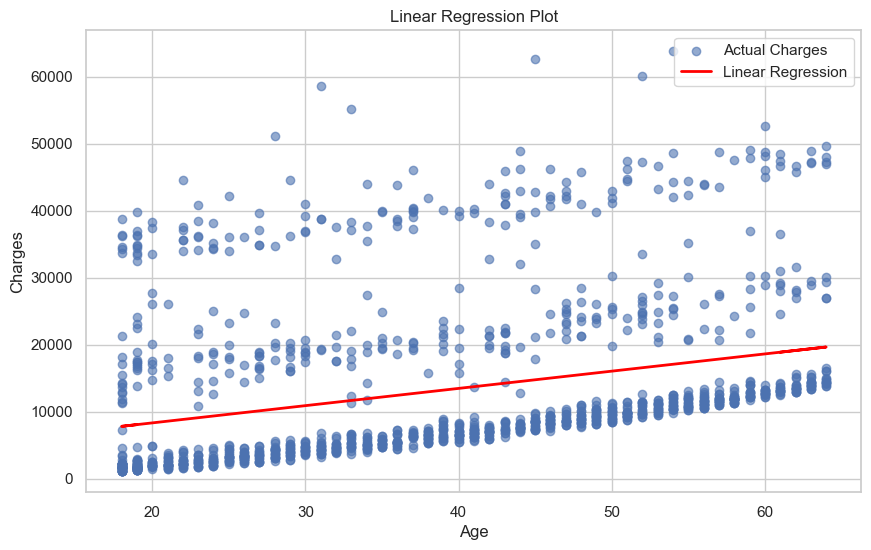

In [78]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Chọn biến độc lập và biến phụ thuộc
X = df['age']       # biến độc lập
y = df['charges']   # biến phụ thuộc

# Thêm hằng số vào X
X = sm.add_constant(X)

# Tạo mô hình hồi quy tuyến tính
model = sm.OLS(y, X)

# Huấn luyện mô hình
results = model.fit()

# Vẽ biểu đồ hồi quy tuyến tính
plt.figure(figsize=(10, 6))
plt.scatter(X['age'], y, label='Actual Charges', alpha=0.6)
plt.plot(X['age'], results.predict(X), color='red', label='Linear Regression', linewidth=2)

# Đặt tiêu đề và nhãn cho trục x, trục y
plt.title('Linear Regression Plot')
plt.xlabel('Age')
plt.ylabel('Charges')

# Hiển thị legend
plt.legend()

# Hiển thị biểu đồ
plt.show()


**Biểu đồ phân phối (distplot) cho dự đoán và sai số của mô hình hồi quy tuyến tính 1 biến**

C:\Users\Lan Anh\AppData\Local\Temp\ipykernel_8028\1234654097.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, color="skyblue", label="Actual Charges", hist=False)
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

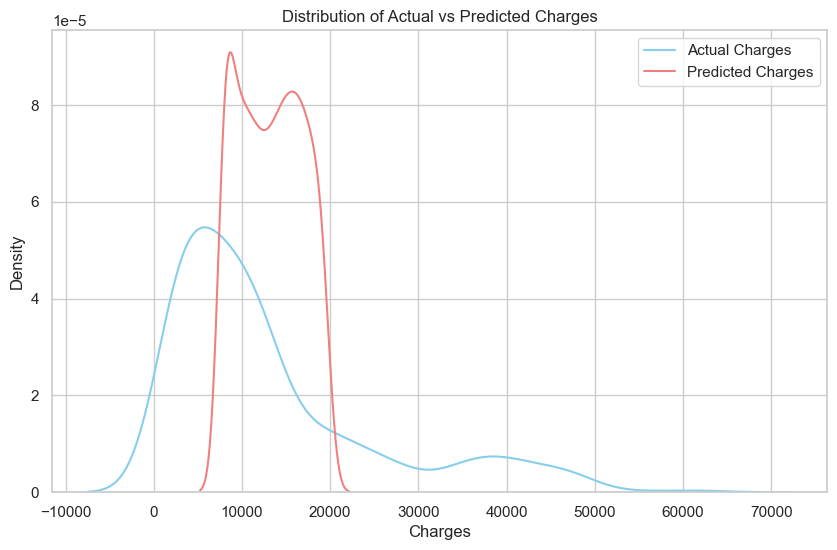

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dự đoán giá trị y từ mô hình
y_pred = results.predict(X)

# Tạo distplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.distplot(y, color="skyblue", label="Actual Charges", hist=False)
sns.distplot(y_pred, color="lightcoral", label="Predicted Charges", hist=False)

# Đặt tiêu đề và nhãn cho trục x, trục y
plt.title('Distribution of Actual vs Predicted Charges')
plt.xlabel('Charges')
plt.ylabel('Density')

# Hiển thị legend
plt.legend()

# Hiển thị biểu đồ
plt.show()


**Biểu đồ scatter plot minh họa prediction error cho mô hình hồi quy tuyến tính**

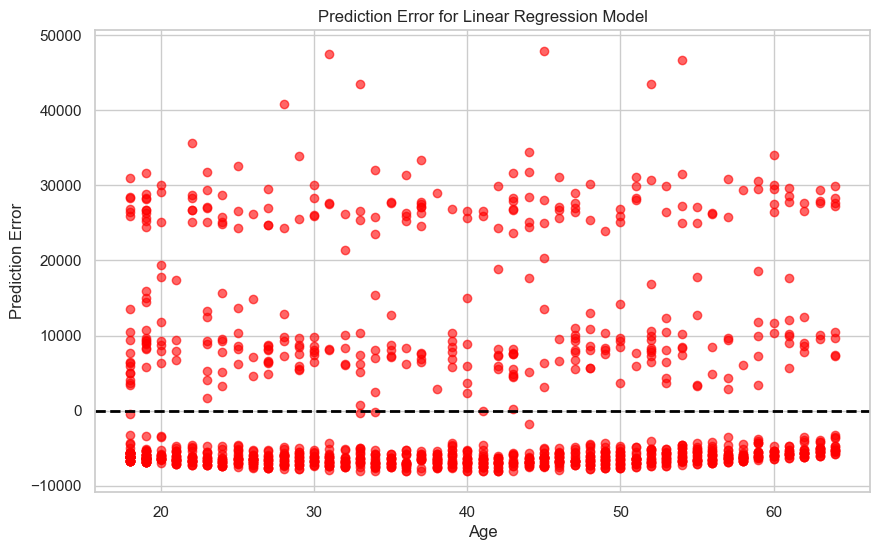

In [80]:
import matplotlib.pyplot as plt

# Dự đoán từ mô hình
y_pred = results.predict(X)

# Tính toán sai số dự đoán
errors = y - y_pred

# Vẽ biểu đồ prediction error
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], errors, color='red', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)  # Đường thẳng ở y=0 cho thấy khi dự đoán chính xác

# Đặt tiêu đề và nhãn cho trục x, trục y
plt.title('Prediction Error for Linear Regression Model')
plt.xlabel('Age')
plt.ylabel('Prediction Error')

# Hiển thị biểu đồ
plt.show()


##### Hồi quy tuyến tính 2 biến:

In [81]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Chọn biến độc lập và biến phụ thuộc
X = df[['age', 'bmi']]      # biến độc lập
y = df['charges']   # biến phụ thuộc

# Thêm hằng số vào X
X = sm.add_constant(X)

# Tạo mô hình hồi quy tuyến tính
model = sm.OLS(y, X)

# Huấn luyện mô hình
results = model.fit()

# In ra kết quả
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     88.21
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           1.05e-36
Time:                        04:43:03   Log-Likelihood:                -14384.
No. Observations:                1337   AIC:                         2.877e+04
Df Residuals:                    1334   BIC:                         2.879e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6403.0540   1744.905     -3.670      0.000   -9826.111   -2979.996
age          241.4095     22.321     10.815      0.000     197.621     285.198
bmi          333.0864     51.387      6.482      0.000     232.278     433.895
==============================================================================
Omnibus:                      321.193   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.784
Skew:                           1.510   Prob(JB):                    5.16e-129
Kurtosis:                       4.220   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Nhận xét:**

* Adj. R-squared = 11.7%: khá thấp. Mức độ giải thích của mô hình 2 biến tăng lên so với mô hình 1 biến, nhưng vẫn là mức độ thấp. Đồng thời chỉ ra rằng mô hình chỉ giải thích một phần nhỏ sự biến động của biến phụ thuộc (charges).

* Prob (F-statistic) = 1.05e-36: Giá trị này rất thấp, chỉ ra rằng mô hình có độ chính xác cao.

* P>|t| cho cả 'age' và 'bmi' đều là 0.0: Cả hai biến độc lập đều có ảnh hưởng đáng kể đến giá trị của 'charges'.

* Phương trình tổng quát cho mô hình hồi quy tuyến tính 2 biến: 

        charges = intercept + (age * coef_age) + (bmi * coef_bmi)

        charges = -6403.0540 + 241.4095 * age + 333.0864 * bmi

Trong đó:
* intercept: Hệ số chặn (intercept) là -6403.0540.
* age: Biến độc lập là age.
* coef_age: Hệ số của age là 241.4095.
* bmi: Biến độc lập là bmi.
* coef_bmi: Hệ số của bmi là 333.0864.

### Phần V: Bài toán phân lớp (Clustering)

**Dùng Elbow Method để xác định được số cụm tối ưu nhất cho bài toán phân lớp**

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Lan Anh\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Pop

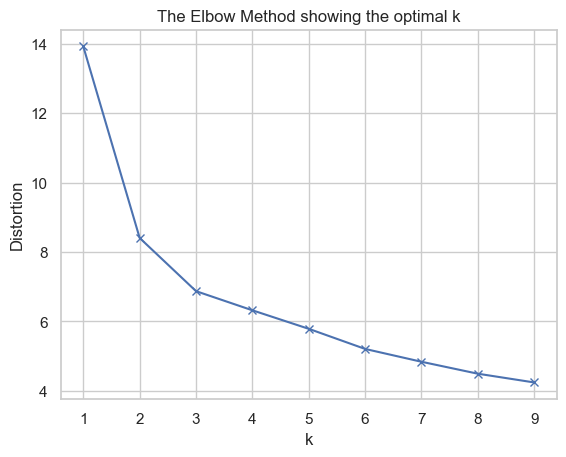

In [82]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def elbowmethod():    
    
    # k means determine k
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X,
kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
# Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
elbowmethod()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
         age        bmi  children       charges
0  27.344371  29.013171  1.062914   6433.006557
1  51.630931  31.086318  1.108963  12721.902468
2  39.914634  35.274177  1.170732  40426.140019


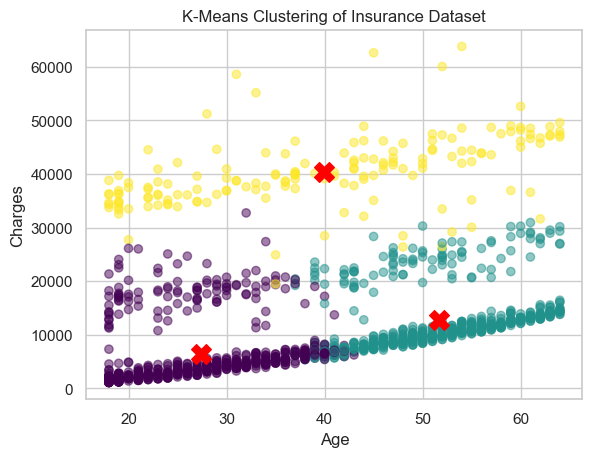

In [83]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Chọn các biến để thực hiện clustering
features = ['age', 'bmi', 'children', 'charges']
X = df[features]

# Chuẩn hóa dữ liệu để có mean=0 và variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Sử dụng K-Means với số cụm (clusters) mong muốn, ví dụ: 3
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Hiển thị các thông tin của các cụm
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_cluster_centers = pd.DataFrame(cluster_centers, columns=features)
print("Cluster Centers:")
print(df_cluster_centers)

# Hiển thị biểu đồ phân phối các cụm
plt.scatter(df['age'], df['charges'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(df_cluster_centers['age'], df_cluster_centers['charges'], c='red', marker='X', s=200)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('K-Means Clustering of Insurance Dataset')
plt.show()


e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


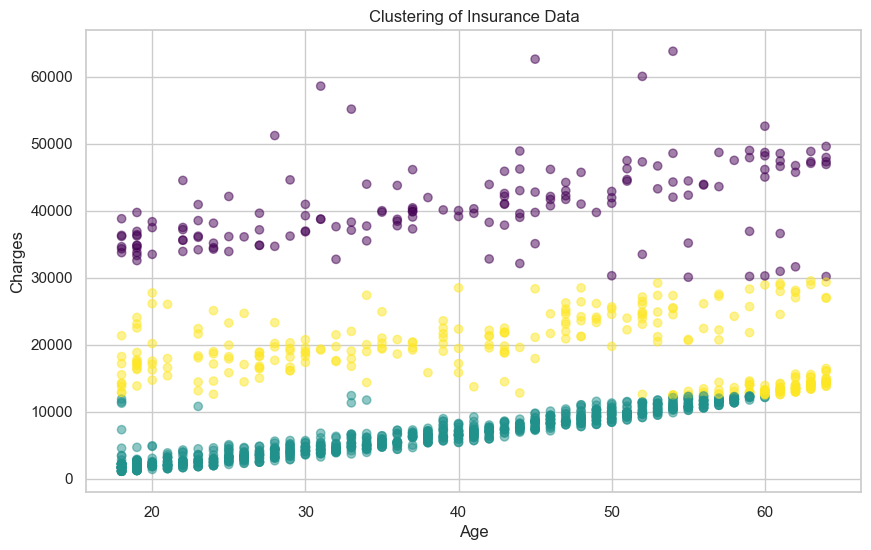

In [84]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Chọn các biến để phân cụm (ví dụ: age và charges)
X = df[['age', 'charges']]

# Áp dụng thuật toán K-Means để phân cụm thành 3 nhóm (có thể điều chỉnh số lượng nhóm theo nhu cầu)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Vẽ biểu đồ minh họa cho cụm đã tạo
plt.figure(figsize=(10, 6))

# Biểu đồ scatter plot cho từng cụm
plt.scatter(df['age'], df['charges'], c=df['cluster'], cmap='viridis', alpha=0.5)

# Đặt tiêu đề và nhãn cho trục x, trục y
plt.title('Clustering of Insurance Data')
plt.xlabel('Age')
plt.ylabel('Charges')

# Hiển thị biểu đồ
plt.show()


e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstanc

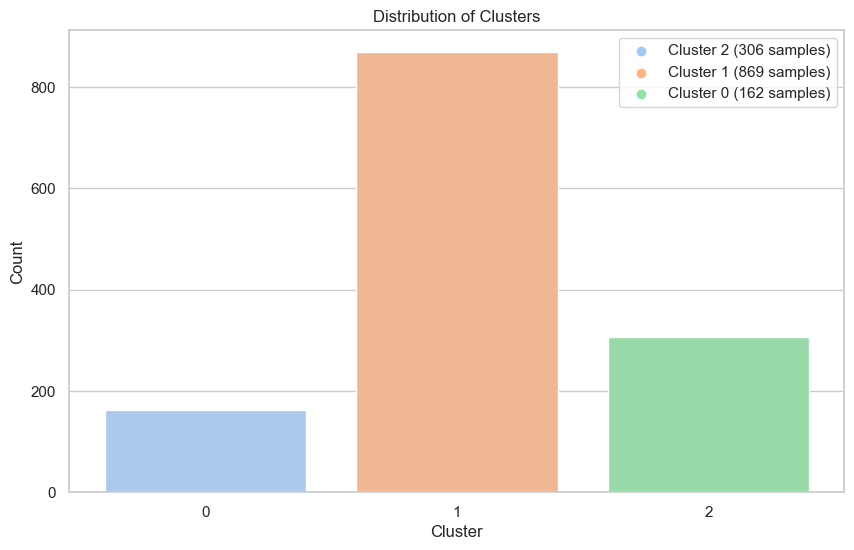

In [85]:
# Chọn các biến để phân cụm (ví dụ: age và charges)
X = df[['age', 'charges']]

# Áp dụng thuật toán K-Means để phân cụm thành 3 nhóm (có thể điều chỉnh số lượng nhóm theo nhu cầu)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Tạo biểu đồ cột minh họa cho cụm đã tạo
plt.figure(figsize=(10, 6))

# Sử dụng seaborn để tạo biểu đồ cột với palette pastel
pastel_palette = sns.color_palette("pastel", n_colors=len(df['cluster'].unique()))
sns.countplot(x='cluster', data=df, palette=pastel_palette)

# Đặt tiêu đề và nhãn cho trục x, trục y
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Tìm cột tương ứng với từng cluster và đánh dấu legend
for i, label in enumerate(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == label]
    column_label = f'Cluster {label} ({len(cluster_data)} samples)'
    plt.scatter([], [], color=pastel_palette[i], label=column_label)

# Hiển thị legend
plt.legend()

# Hiển thị biểu đồ
plt.show()

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


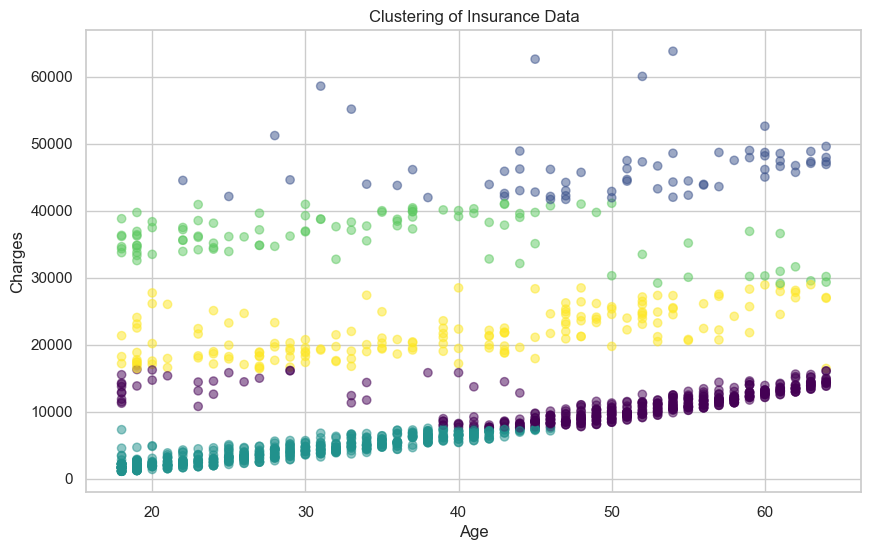

In [86]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Chọn các biến để phân cụm (ví dụ: age, charges, bmi, children)
X = df[['age', 'charges', 'bmi', 'children']]

# Áp dụng thuật toán K-Means để phân cụm thành 5 nhóm (có thể điều chỉnh số lượng nhóm theo nhu cầu)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Vẽ biểu đồ minh họa cho cụm đã tạo
plt.figure(figsize=(10, 6))

# Biểu đồ scatter plot cho từng cụm
plt.scatter(df['age'], df['charges'], c=df['cluster'], cmap='viridis', alpha=0.5)

# Đặt tiêu đề và nhãn cho trục x, trục y
plt.title('Clustering of Insurance Data')
plt.xlabel('Age')
plt.ylabel('Charges')

# Hiển thị biểu đồ
plt.show()


e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstanc

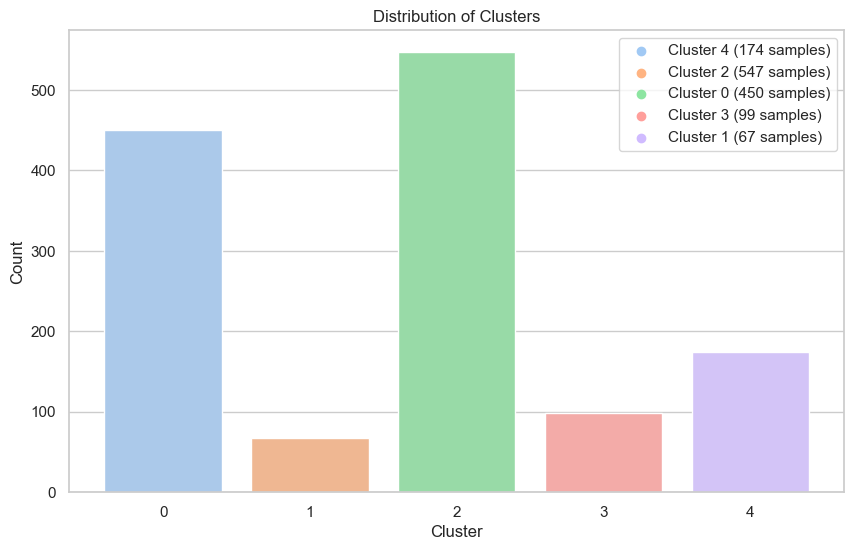

In [87]:
# Chọn các biến để phân cụm (ví dụ: age, charges, bmi, children)
X = df[['age', 'charges', 'bmi', 'children']]

# Áp dụng thuật toán K-Means để phân cụm thành 5 nhóm (có thể điều chỉnh số lượng nhóm theo nhu cầu)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Tạo biểu đồ cột minh họa cho cụm đã tạo
plt.figure(figsize=(10, 6))

# Sử dụng seaborn để tạo biểu đồ cột với palette pastel
pastel_palette = sns.color_palette("pastel", n_colors=len(df['cluster'].unique()))
sns.countplot(x='cluster', data=df, palette=pastel_palette)

# Đặt tiêu đề và nhãn cho trục x, trục y
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Tìm cột tương ứng với từng cluster và đánh dấu legend
for i, label in enumerate(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == label]
    column_label = f'Cluster {label} ({len(cluster_data)} samples)'
    plt.scatter([], [], color=pastel_palette[i], label=column_label)

# Hiển thị legend
plt.legend()

# Hiển thị biểu đồ
plt.show()